In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 보스턴 주택 가격 데이터셋
from keras. datasets import boston_housing
(train_data, train_labels),(test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
# 데이터를 정규화.
# sklearn을 가져다써도 되지만 직접 만들어보기로 하자.

mean = train_data.mean(axis=0)

In [6]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [7]:
train_data -= mean
# train_data = train_data - mean 과 같은 표현

In [8]:
# 표준 편차를 구한다.
std = train_data.std(axis=0) #numpy배열이기에 numpy에 있는 표준편차 구하는 함수를 쓰자.

In [9]:
train_data /= std
#train_data  = tarin_data / std

In [10]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [11]:
 # 표준편차가 0이면 변별력이 없기에 의미가 없는 것.
mean = test_data.mean(axis=0)
test_data -= mean
std = test_data.std(axis=0)
test_data /=std

In [12]:
test_data

array([[ 2.8040301 , -0.50784934,  0.96960877, ...,  0.90513041,
        -4.27829517,  2.51324773],
       [-0.55530596, -0.50784934, -0.17801704, ..., -0.28485844,
         0.3909446 ,  0.58604286],
       [-0.56808398, -0.50784934, -0.86176938, ...,  0.90513041,
         0.41570668, -0.38506427],
       ...,
       [-0.23539182, -0.50784934,  1.17955762, ..., -1.82192738,
         0.32313459, -1.55879807],
       [-0.5113909 , -0.50784934, -0.71849348, ..., -0.48318992,
         0.34967446, -0.38956708],
       [-0.03148414, -0.50784934,  1.17955762, ..., -1.82192738,
        -1.57465677, -0.3745577 ]])

In [13]:
# 신경망을 만든다. 
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))# 결과로 집값 하나가 필요한 거니깐. 활성함수 안써주면 디폴트는 항등함수니깐 그냥 둬도 됨.(regression에선 대부분 그러는 듯.)

  model.compile(optimizer='rmsprop', 
                loss='mse',
                metrics=['mae'])
  return model

In [14]:
# K-folder 검증 #데이터가 적을때 쓴다.
k = 4

num_val_samples = len(train_data) // k #폴더의 사이즈
all_scores = []

for i in range(k):
  print('처리중인 폴드 #',i)

  # 검증 데이터를 준비: k번째 분할
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
  # print(i,(i+1)*num_val_samples)

  # 훈련 데이터의 준비:
  partial_train_data = np.concatenate(#두개의 데이터를 합침.
    [train_data[: i * num_val_samples],#처음부터 여기까지라는 뜻
    train_data[(i+1)*num_val_samples:]], axis=0) #여기서부터 끝까지 라는 뜻을 슬라이싱으로 표현한 것.(k-folder 그림 참조)
  
  partial_train_labels = np.concatenate(
    [train_labels[: i * num_val_samples],
    train_labels[(i+1)*num_val_samples:]], axis=0)

  model = build_model()
  model.fit(partial_train_data,
            partial_train_labels,
            epochs=20,
            batch_size=1,
            verbose=0) # 불필요한 시스템 메세지 skip
  
  val_mse, val_mae = model.evaluate(val_data, val_labels,verbose=0)
  all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [15]:
all_scores

[1.9884647130966187, 2.403876304626465, 2.5251777172088623, 2.5850555896759033]

In [16]:
np.mean(all_scores)

2.3756435811519623

In [48]:
# K-folder 검증
k = 4
num_epochs = 500

num_val_samples = len(train_data) // k #폴더의 사이즈
all_scores = []

for i in range(k):
  print('처리중인 폴드 #',i)

  # 검증 데이터를 준비: k번째 분할
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
  
  # 훈련 데이터의 준비:
  partial_train_data = np.concatenate(
    [train_data[: i * num_val_samples],
    train_data[(i+1)*num_val_samples:]], axis=0)
  
  partial_train_labels = np.concatenate(
    [train_labels[: i * num_val_samples],
    train_labels[(i+1)*num_val_samples:]], axis=0)

  model = build_model()
  history = model.fit(partial_train_data,
              partial_train_labels,
              epochs=num_epochs,#500번 돌게 됨.
              batch_size=1,
              validation_data=(val_data, val_labels), #fit에서 검증을 해보자.
              verbose=0)
  mae_history = history.history['mae']
  
  all_scores.append(mae_history)


처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [49]:
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]

Text(0, 0.5, 'Validation MAE')

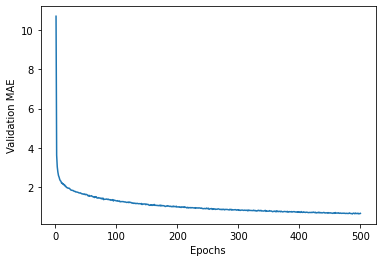

In [50]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')